# Yemeni Dataset: Public Perceptions of the United States in 2014

### 1. Set up working environment:

In [12]:
import numpy as np
import collections 
import scipy as sp
import pandas as pd
from scipy.stats import norm
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as st
%matplotlib inline 

### 2. Load data and take a glance at its current state:

In [13]:
yemen_data = pd.read_csv("../../Desktop/Y.Work.csv")

In [14]:
yemen_data.head()

,Profile1,Profile2,Profile3,Profile4,Profile5,Profile6,Q1,Q2,Q3,Q4,...,Q32.Choice4,Q32.Choice5,Q32.Choice6,Q33,Q34.Choice1,Q34.Choice2,Q34.Choice3,Q34.Choice4,Q34.Choice5,Q34.Choice6
0,1,5,1,2,3,6,2,2,2,1,...,NaN,NaN,NaN,3,1,2,6,5,4,3
1,1,3,1,3,1,6,2,2,2,1,...,3.0,4.0,6.0,1,1,3,6,4,2,5
2,2,5,1,2,3,6,2,2,1,1,...,2.0,3.0,6.0,2,1,2,6,3,5,4
3,2,4,1,2,2,6,2,2,2,1,...,3.0,2.0,1.0,3,3,1,6,5,2,4
4,2,5,1,2,1,6,1,2,1,2,...,NaN,NaN,1.0,1,1,2,5,3,4,6


#### Identifies Columns Containing Less Than Expected Count: 

In [15]:
def total_missing_values(dataset):   
    """This function searches through all the columns for blank values or missing values."""
    for i in range(len(dataset.count())):
        if dataset.count()[i] != 783:
            print(dataset.columns[i])
        else:
            pass

total_missing_values(yemen_data)

Q31.Choice1
Q31.Choice2
Q31.Choice3
Q31.Choice4
Q31.Choice5
Q32.Choice1
Q32.Choice2
Q32.Choice3
Q32.Choice4
Q32.Choice5
Q32.Choice6


#### Identifies Columns Where NaN values Present:

In [16]:
#This function looks for any missing values, and appends these missing values to a list.
yemen_data.columns[yemen_data.isnull().any()].tolist()  

['Q31.Choice1',
 'Q31.Choice2',
 'Q31.Choice3',
 'Q31.Choice4',
 'Q31.Choice5',
 'Q32.Choice1',
 'Q32.Choice2',
 'Q32.Choice3',
 'Q32.Choice4',
 'Q32.Choice5',
 'Q32.Choice6']

### Clean the data:

In [17]:
#This changes any periods to underscores 
yemen_data.columns = [c.lower().replace(".","_") for c in yemen_data.columns]

In [18]:
#This renames the columns with a readable profiling characteristic
yemen_data.rename(columns={'profile1': 'gender', 
                           'profile2': 'level_of_education', 
                           'profile3': 'urban_or_rural', 
                           'profile4': 'employment', 
                           'profile5': 'age', 
                           'profile6': 'region'}, 
                  inplace=True)

In [19]:
#Filling in all the NaN values with 0
yemen_data = yemen_data.fillna(value=0) 

In [20]:
def isolation(dataset):
    for col in dataset:
        col_to_string = str(col)
        total_values = dataset[col_to_string].value_counts()
        total_values_to_frame = pd.Series.to_frame(total_values)
        isolate_rows = total_values_to_frame.index
        print (isolate_rows, col_to_string)
        
isolation(yemen_data)

Int64Index([1, 2], dtype='int64') gender
Int64Index([4, 5, 2, 1, 3], dtype='int64') level_of_education
Int64Index([1, 2, 4], dtype='int64') urban_or_rural
Int64Index([2, 1, 3], dtype='int64') employment
Int64Index([2, 1, 3, 4, 5], dtype='int64') age
Int64Index([1, 3, 6, 2, 4], dtype='int64') region
Int64Index([2, 1], dtype='int64') q1
Index(['2', '1', ' '], dtype='object') q2
Index(['2', '1', ' '], dtype='object') q3
Index(['1', '2', ' ', '3'], dtype='object') q4
Index(['2', '1', ' '], dtype='object') q5
Index(['2', '1', ' '], dtype='object') q6
Index([' ', '2', '1', '3'], dtype='object') q6_5
Index(['5', '4', '3', '2', ' ', '1'], dtype='object') q7_choice1
Index(['1', '2', '3', '5', '4', ' '], dtype='object') q7_choice2
Index(['1', '2', '3', ' ', '4', '5'], dtype='object') q7_choice3
Index(['4', '3', '5', '2', ' ', '1'], dtype='object') q7_choice4
Index(['5', '4', '3', '1', '2', ' '], dtype='object') q7_choice5
Index(['2', '4', '5', '3', '1', ' '], dtype='object') q8
Index(['1', '2', 

### Consolidating missing / blank values into a separate column:
### Define numeric values with strings:

In [34]:
#These are the cleaned up profiling characteristics:

gend = (yemen_data.replace(to_replace = [1,2], 
                             value=["Male", 
                            "Female"]).gender)

edu = (yemen_data.replace(to_replace = [1,2,3,4,5], 
                                value=["University", 
                                       "High School", 
                                       "Elementary", 
                                       "Read and Write", 
                                       "Cannot Read or Write"]).level_of_education)

employ = (yemen_data.replace(to_replace = [1,2,3], 
                                 value=["Employed", 
                                "Unemployed", 
                                "Student"]).employment)

ur_ru = (yemen_data.replace(to_replace = [1,2,4], 
                                  value=["Rural", 
                                         "Urban", 
                                         "Missing"]).urban_or_rural)

age  = (yemen_data.replace(to_replace = [1,2,3,4,5], 
                                 value=["15-19", 
                                        "20-29", 
                                        "30-29", 
                                        "40-60", 
                                        "x>60"]).age)

reg = (yemen_data.replace(to_replace = [1,2,3,4,5,6], 
                              value=["Azal", 
                                     "Janid", 
                                     "Tihama", 
                                     "Hadramout", 
                                     "Taiz", 
                                     "Aden"]).region)

numeric_yemen_data = yemen_data


In [35]:
# This replace the numeric values with strings for each question

a1 = (yemen_data.replace(to_replace = [1,2], value=["Yes", "No"]).q1)

a2 = (yemen_data.replace(to_replace = [1,2," "], value=["Yes", "No", "Missing"]).q2)

a3 = (yemen_data.replace(to_replace = ["1","2", " "], value=["Yes", "No", "Missing"]).q3)

a4 = (yemen_data.replace(to_replace = ["1","2","3"," "], value=["Yes", "No", "Missing", "Missing"]).q4)

a5 = (yemen_data.replace(to_replace = ["1","2"," "], value=["Yes", "No", "Missing"]).q5)

a6 = (yemen_data.replace(to_replace = ["1","2"," "], value=["Yes", "No", "Missing"]).q6)

a7_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","5"," "], 
                                 value=["Radio", 
                                        "Internet", 
                                        "Television", 
                                        "Newspaper", 
                                        "Your Friends",
                                        "Missing"]).q7_choice1)

a7_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","5"," "], 
                                 value=["Radio", 
                                        "Internet", 
                                        "Television", 
                                        "Newspaper", 
                                        "Your Friends",
                                        "Missing"]).q7_choice2)

a7_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","5"," "], 
                                 value=["Radio", 
                                        "Internet", 
                                        "Television", 
                                        "Newspaper", 
                                        "Your Friends",
                                        "Missing"]).q7_choice3)


a7_choice4 = (yemen_data.replace(to_replace = ["1","2","3","4","5"," "], 
                                 value=["Radio", 
                                        "Internet", 
                                        "Television", 
                                        "Newspaper", 
                                        "Your Friends",
                                        "Missing"]).q7_choice4)

a8 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                         value=["Strongly Agree", 
                                "Agree", 
                                "Disagree", 
                                "Strongly Disagree", 
                                "No Opinion", 
                                "Missing"]).q8)

a9 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                         value=["Strongly Agree", 
                                "Agree", 
                                "Disagree", 
                                "Strongly Disagree", 
                                "No Opinion", 
                                "Missing"]).q9)
                                

a10 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q10)

a11 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q11)

a12 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q12)

a13 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                              value=["Strongly Agree", 
                                     "Agree", 
                                     "Disagree", 
                                     "Strongly Disagree", 
                                     "No Opinion", 
                                     "Missing"]).q13)

a14 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["America", 
                                 "Saudi Arabia", 
                                 "Osama Bin Laden \n and his supporters", 
                                 "Mixture of \n Saudi Arabia and America", 
                                 "No Opinion", 
                                 "Missing"]).q14)

a15 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q15)

a16 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q16)

a17 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q17)

a18 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q18)

a19 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Very Positive", 
                                 "Positive", 
                                 "Negative", 
                                 "Very Negative", 
                                 "No Opinion", 
                                 "Missing"]).q19)

a20 = (yemen_data.replace(to_replace = ["1","2","3","4","5","14", " "], 
                          value=["Very Positive", 
                                 "Positive", 
                                 "Negative", 
                                 "Very Negative", 
                                 "No Opinion",
                                 "Missing",
                                 "Missing"]).q20)

a21 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q21)

a22 = (yemen_data.replace(to_replace = ["1","2","3","4","5", " "], 
                          value=["Strongly Agree", 
                                 "Agree", 
                                 "Disagree", 
                                 "Strongly Disagree", 
                                 "No Opinion", 
                                 "Missing"]).q22)

a23_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","25"," "], 
                          value=["America's use \n of drones", 
                                 "American invasion \n of Iraq in 2003", 
                                 "America's position \n regarding the Palestinian \n Israeli Crisis", 
                                 "Missing", 
                                 "Missing", 
                                 "Missing"]).q23_choice1)

a23_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","25"," "], 
                          value=["America's use of drones", 
                                 "American invasion of Iraq in 2003", 
                                 "America's position \n regarding the Palestinian \n Israeli Crisis", 
                                 "Missing", 
                                 "Missing", 
                                 "Missing"]).q23_choice2)


a23_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","25"," "], 
                          value=["America's use of drones", 
                                 "American invasion of Iraq in 2003", 
                                 "America's position \n regarding the Palestinian \n Israeli Crisis", 
                                 "Missing", 
                                 "Missing", 
                                 "Missing"]).q23_choice3)

a24 = (yemen_data.replace(to_replace = ["1","2","3","4","5"," "], 
                          value=["Russia", 
                                 "America", 
                                 "Britain", 
                                 "Jordan", 
                                 "I don't know", 
                                 "Missing"]).q24)

a25_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","12"," "], 
                                  value=["The presence of \n American soldiers \n in Yemen", 
                                         "American spies \n in Yemen", 
                                         "American drones \n in Yemen", 
                                         "Missing", 
                                         "Missing", 
                                         "Missing"]).q25_choice1)

a25_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","12"," "], 
                                  value=["The presence of \n American soldiers \n in Yemen", 
                                         "American spies \n in Yemen", 
                                         "American drones \n in Yemen", 
                                         "Missing", 
                                         "Missing", 
                                         "Missing"]).q25_choice2)

a25_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","12"," "], 
                                  value=["The presence of \n American soldiers \n in Yemen", 
                                         "American spies in Yemen", 
                                         "American drones in Yemen", 
                                         "Missing", 
                                         "Missing", 
                                         "Missing"]).q25_choice3)

a26 = (yemen_data.replace(to_replace = ["1","2","3"," "], 
                          value=["Yes", 
                                 "No", 
                                 "No Opinion", 
                                 "Missing"]).q26)

a27_choice1 = (yemen_data.replace(to_replace = ["1","2","3","5"," "], 
                                  value=["The drone strike \n that hit a \n wedding celebration", 
                                         "The Taiz burnings", 
                                         "Al-Qaeda's attack \n on the hospital at \n the Ministry of Defense",
                                         "Missing", 
                                         "Missing"]).q27_choice1)

a27_choice2 = (yemen_data.replace(to_replace = ["1","2","3","5"," "], 
                                  value=["The drone strike \n that hit a \n wedding celebration", 
                                         "The Taiz burnings", 
                                         "Al-Qaeda's attack \n on the hospital at \n the Ministry of Defense",
                                         "Missing", 
                                         "Missing"]).q27_choice2)

a27_choice3 = (yemen_data.replace(to_replace = ["1","2","3","5"," "], 
                                  value=["The drone strike \n that hit a \n wedding celebration", 
                                         "The Taiz burnings", 
                                         "Al-Qaeda's attack \n on the hospital at \n the Ministry of Defense",
                                         "Missing", 
                                         "Missing"]).q27_choice3)

a28_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism",
                                         "Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing"]).q28_choice1)


a28_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism",
                                         "Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing"]).q28_choice2)

a28_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism",
                                         "Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing"]).q28_choice3)

a28_choice4 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism","Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing"]).q28_choice4)

a28_choice5 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism",
                                         "Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing"]).q28_choice5)

a28_choice6 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6","8"," "], 
                                  value=["Gas Crisis", 
                                         "Electricity Crisis", 
                                         "Terrorism",
                                         "Water Crisis", 
                                         "Food Crisis", 
                                         "Civil War", 
                                         "Missing",
                                         "Missing"]).q28_choice6)

a29_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice1)

a29_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice2)

a29_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice3)

a29_choice4 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice4)

a29_choice5 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice5)

a29_choice6 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Freedom of Expression", 
                                         "Government Services", 
                                         "Economic Opportunities",
                                         "Legal Equality", 
                                         "Technology", 
                                         "Security & Protection", 
                                         "Missing"]).q29_choice6)

a30 = (yemen_data.replace(to_replace = ["1","2","3","5"," "], 
                          value=["Yes", 
                                 "No", 
                                 "No Opinion", 
                                 "Missing", 
                                 "Missing"]).q30)

a31_choice1 = (yemen_data.replace(to_replace = [1.0,2.0,3.0,4.0,5.0,6.0,9.0], 
                                  value=["American Foreign Policy", 
                                         "Racism", 
                                         "Culture of Openess", 
                                         "Inequality between \n rich and poor", 
                                         "Spying by the \n government on \n American people", 
                                         "Missing",
                                         "Missing"]).q31_choice1)

a31_choice2 = (yemen_data.replace(to_replace = [1.0,2.0,3.0,4.0,5.0,6.0,9.0,43.0], 
                                  value=["American Foreign Policy", 
                                         "Racism", 
                                         "Culture of Openess", 
                                         "Inequality between \n rich and poor", 
                                         "Spying by the \n government on \n American people", 
                                         "Missing",
                                         "Missing",
                                         "Missing"]).q31_choice2)

q31_choice3 = (yemen_data.replace(to_replace = [1.0,2.0,3.0,4.0,5.0,6.0,9.0,43.0], 
                                  value=["American Foreign Policy", 
                                         "Racism", 
                                         "Culture of Openess", 
                                         "Inequality between \n rich and poor", 
                                         "Spying by the \n government on \n American people", 
                                         "Missing",
                                         "Missing",
                                         "Missing"]).q31_choice3)

a31_choice4 = (yemen_data.replace(to_replace = [1.0,2.0,3.0,4.0,5.0,6.0,9.0,43.0], 
                                  value=["American Foreign Policy", 
                                         "Racism", 
                                         "Culture of Openess", 
                                         "Inequality between \n rich and poor", 
                                         "Spying by the \n government on \n American people", 
                                         "Missing",
                                         "Missing",
                                         "Missing"]).q31_choice4)

a31_choice5 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6","9"], 
                                  value=["American Foreign Policy", 
                                         "Racism", 
                                         "Culture of Openess", 
                                         "Inequality between \n rich and poor", 
                                         "Spying by the \n government on \n American people", 
                                         "Missing",
                                         "Missing"]).q31_choice5)

a33 = (yemen_data.replace(to_replace = ["1","2","3","6"," "], 
                          value=["The aid", 
                                 "The country", 
                                 "No opinion",
                                 "Missing", 
                                 "Missing"]).q33)

a34_choice1 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure", 
                                         "Missing"]).q34_choice1)

a34_choice2 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure", 
                                         "Missing"]).q34_choice2)

a34_choice3 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6","53", " "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure",
                                         "Missing",
                                         "Missing"]).q34_choice3)

a34_choice4 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure", 
                                         "Missing"]).q34_choice4)

a34_choice5 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure", 
                                         "Missing"]).q34_choice5)

a34_choice6 = (yemen_data.replace(to_replace = ["1","2","3","4","5","6"," "], 
                                  value=["Religion", 
                                         "Family", 
                                         "Work or Employment",
                                         "Health", 
                                         "Education", 
                                         "Leisure", 
                                         "Missing"]).q34_choice6)

In [36]:
question_1 = "Have you traveled outside of Yemen?"
question_2 = "Have you traveled to the United States?"
question_3 = "Do you know of any foreigners in Yemen or abroad?"
question_4 = "If you received the opportunity to travel to America, \n and there would not be any problem with your paperwork or visa, \n would you go?"
question_5 = "Do you know of an American foreign aid project in Yemen?"
question_6 = "Do you know of any Yemeni zawamil (poetry) that speaks about America?"
question_7 = "If you wanted to know about political developments or news headlines, \n where would you look first?"
question_8 = "Yemeni news agencies report accurately on Yemeni political events in the news."
question_9 = "There are a number of political developments in Yemen \n that are not understood or not known even today."
question_10 = "Yemeni people are a democratic people."
question_11 = "American politics in Yemen represents the desires of American people."
question_12 = "There are members of American government who oppose American foreign policy in Yemen."
question_13 = "The American government knew of the terrorist operation on 9/11, \n but allowed it to happen anyway."
question_14 = "Who established al-Qaeda?"
question_15 = "One of American's long term goals in Yemen is to occupy the country."
question_16 = "The majority of American citizens realize and understand the difference \n between an extremist and a Yemeni citizen."
question_17 = "American citizens see Yemeni citizens as a people \n who sympathize with extremist movements."
question_18 = "American interests in Yemen oppose the interests of Yemeni people."
question_19 = "What is your opinion of American citizens?"
question_20 = "What is your opinion of the American Government?"
question_21 = "In the news, the voice of Muslim extremists is louder \n than the voice of normal Muslims."
question_22 = "Yemeni people want political and economic stability \n even if it was from a democratic regime."
question_23 = "Among the following options, what is the primary thing \n that affects your opinion of America?"
question_24 = "Among the following countries, who is responsible \n for establishing the state of Israel as well as drawing the Israeli borders?"
question_25 = "Among the following options, what is the primary thing \n that affects your opinion of America?"
question_26 = "There are justifications for America's use of drones?"
question_27 = "Among the following options, what would you consider the worst?"
question_28 = "Please rank the following crises in Yemen \n from greatest importance to least importance?"
question_29 = "Please rank the following positive aspects of America \n from greatest importance to least importance?"
question_30 = "Do you think the American government encourages and helps \n Middle Eastern countries achieve the things listed above?"
question_31 = "Among the following options, what is the worst about America?"
question_32 = "Among the following options, please rank which is most important to least important?"
question_33 = "What is more important in your opinion, \n the country giving aid or the aid itself?"
question_34 = "What is third most important in your life?"

## Descriptive Statistics and Plots:

In [37]:
def basic_plot(answer, question=None):
    """Plots a basic bar plot of any question or profiling characteristic in the dataset"""
    #Prints the question on the survey
    print (question)
    
    #prints a descriptive statistic 
    print(answer.value_counts()/(783)*100)
    
    percentage = (answer.value_counts()/(783)*100)
    percentage.plot(kind="bar", 
                    figsize=(20,10), 
                    stacked=False, 
                    fontsize=20, 
                    legend = False, 
                    colormap="gray")
    
    plt.title(question,fontsize = 30)
    plt.ylabel("Percentage (%) ", fontsize = 30)
    plt.xlabel("Response", fontsize = 25)

### Basic Bar Plot:

One of American's long term goals in Yemen is to occupy the country.
Strongly Agree       42.784163
Agree                21.711367
Strongly Disagree    12.899106
No Opinion           12.899106
Disagree              9.195402
Missing               0.510856
Name: q15, dtype: float64


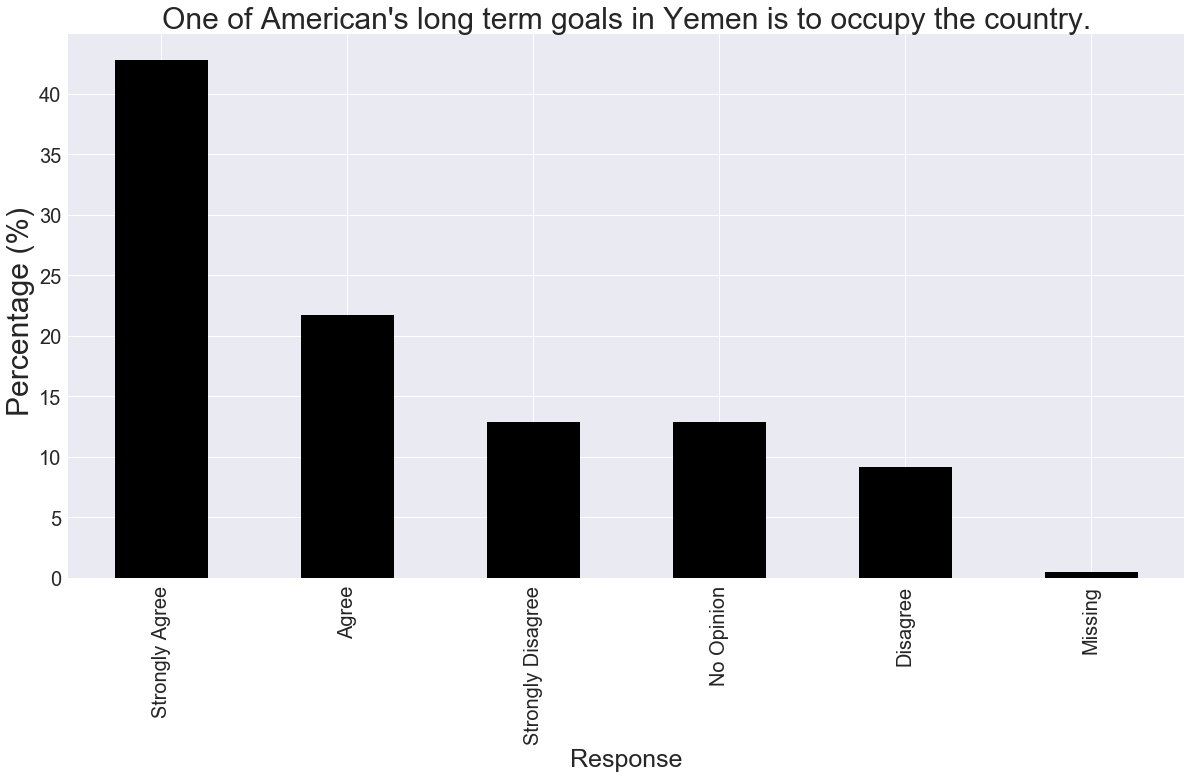

In [38]:
basic_plot(a15,question_15)

##  Cross-Tab Bar Plot:

In [39]:
def cross_stats_plots(x,y,question):
    """Cross tab any profiling characteristic and question with each other through this function"""
    cross_table = pd.crosstab(x,y, margins=False)
    
    #Prints the question:
    print(question)
    
    #Prints contingency table with designated:
    cross_table_percent = (cross_table/(783)*100)
    
#     print (cross_table_percent)
#     print ("\n")
#     for name in cross_table_percent:
#         print (name)
#         print ((cross_table_percent[name] / cross_table_percent['All'])*100)
#         print ("\n")
        
    #Plots the contingency table in a bar chart
    cross_table_percent.plot(kind="bar", 
                     figsize=(25,15), 
                     stacked=False, 
                     legend = False,
                     fontsize=30, 
                     colormap="viridis")
    
    plt.legend(loc=2,fontsize=30)
    plt.title(question,fontsize=30)
    plt.ylabel("Percentage (%) ", fontsize =35)
    plt.xlabel("Profiling charactersitic", fontsize = 30)
  

The majority of American citizens realize and understand the difference 
 between an extremist and a Yemeni citizen.


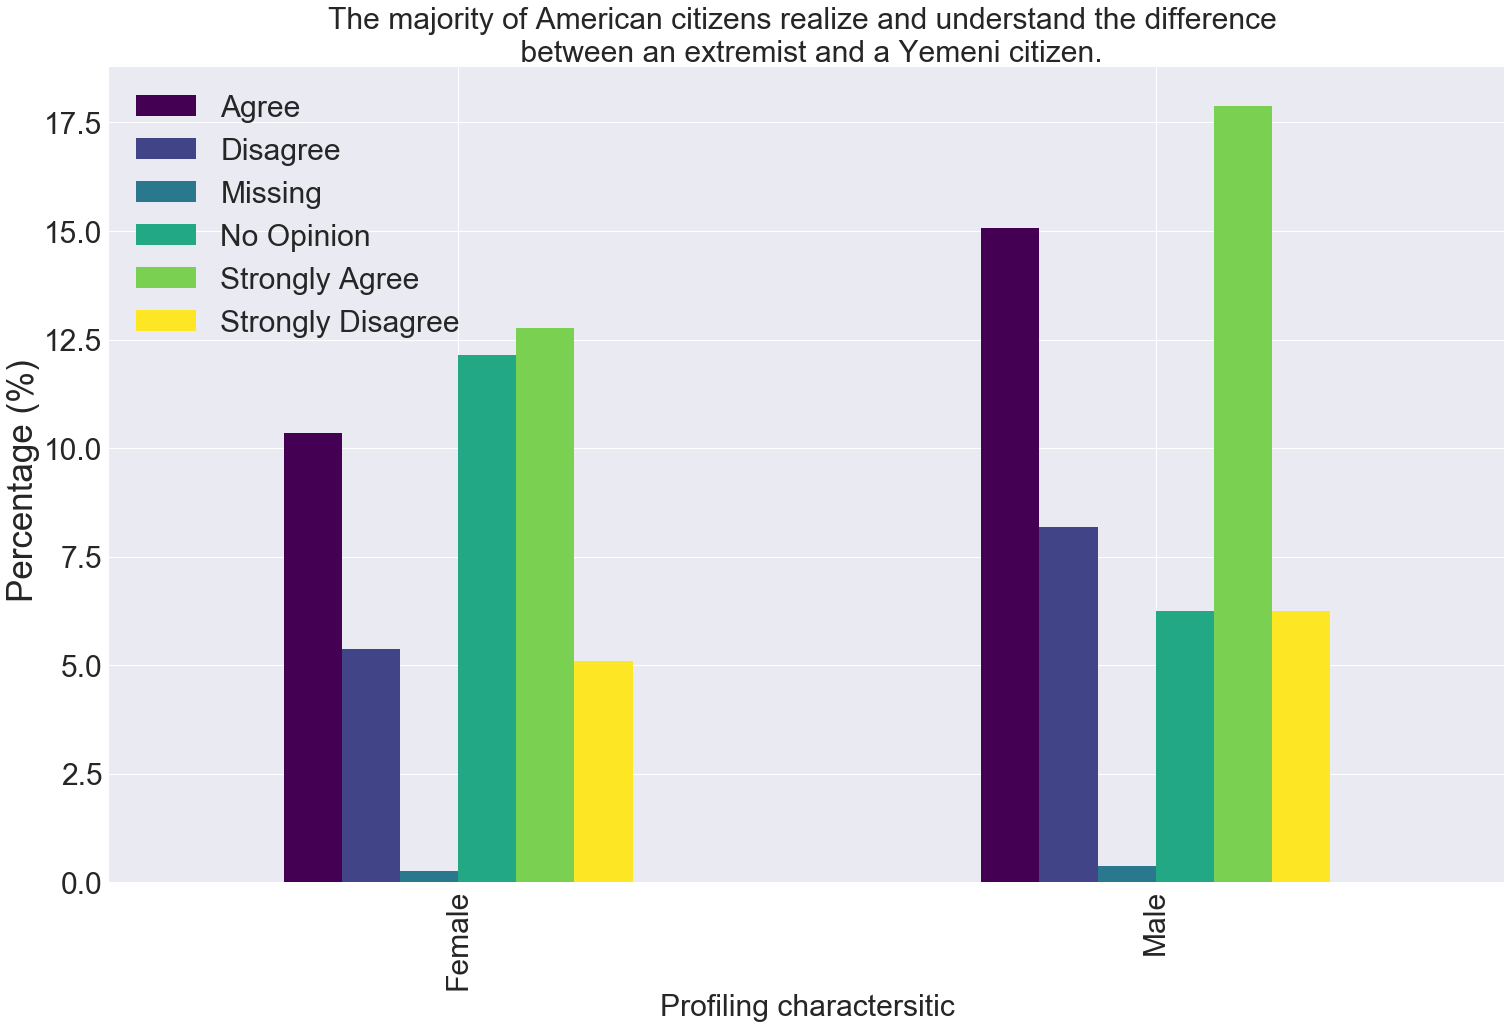

In [42]:
cross_stats_plots(gend,a16,question_16)

## Conditional Probability:

In [21]:
def conditional_prob(X, Y, param1, param2, question, C=None, D=None, E=None):
    
    """Shows the probability of y occuring given x"""
    
    table = pd.crosstab(X,Y,margins = True)
    print (table)
    
    a = (table["All"][param2] / table["All"]["All"])
    print ("P(A)= Probability of being/having/from", param2, a)
    
    b = (table[param1]["All"] / table["All"]["All"])
    print ("P(B)= Probability of saying", param1, "to the question.", b)
    
    b_given_a = (table[param1][param2] / table["All"][param2])
    print ("P(B|A)= Probability that if a person answered this survey question with a", 
           param1, "given that they are (from)", param2)
    print ("P(B|A) =", b_given_a)
       

In [22]:
conditional_prob(gend,a4,"Yes","Female",question_4)

q4      Missing   No  Yes  All
gender                        
Female        5  159  196  360
Male          4  138  281  423
All           9  297  477  783
P(A)= Probability of being/having/from Female 0.459770114943
P(B)= Probability of saying Yes to the question. 0.609195402299
P(B|A)= Probability that if a person answered this survey question with a Yes given that they are (from) Female
P(B|A) = 0.544444444444


## Chi-Squared Test: 
### Hypothesis Test between two groups to determine if they are independent or not.

In [23]:
def chi_test(profile,question):
    
    """Chi-Test tests the independent between two variables and a hypothesis test."""
    
    #This performs a crosstab analysis on the profile and question one with margins and without
    table = pd.crosstab(profile,question)
    table_margins = pd.crosstab(profile,question,margins=True)
    
    #This takes the shape of the new matrix with the marginal
    (m,n) = table_margins.shape
    
    #This slices the title of the last row and column so they can be renamed and later called.
    table_margins = table_margins.rename(columns={"All": "row_totals"})
    table_margins = table_margins.rename(index={"All": "col_totals"})
    
#     This multiplies the outer product of the rows-1 and the columns-1 / divided by the total sample 
    expected = np.outer(table_margins["row_totals"][0:m-1], 
                        table_margins.ix["col_totals"][0:n-1])/783
    
    expected = pd.DataFrame(expected)
    
    expected.columns = table.columns
    expected.index = table.index
    
    #This takes from the chi-squared statistic
    chi_squared_stat = (((table-expected)**2)/expected).sum().sum()
#     print ("Chi_squared statistic:", chi_squared_stat)
    
    # This is the critical value for a 95% confidence
    crit = stats.chi2.ppf(q = 0.95, 
                      df = (m-1)*(n-1))   #Calculates the degrees of freedom  

#     print("Critical Value:", crit)

    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=(m-1)*(n-1))

#     print("P-value", p_value)
    
    final_table = [["Chi-Squared Stat",chi_squared_stat],["Critical Value", crit],["P-Value",p_value]]
    print(pd.DataFrame(final_table))
    
    #This is to determine if the relationship between the two variables in independent or dependent
    
    print ("H0 = The two arguments passed in the function are independent.")
    print ("H1 = The two arguments passed are not independent.")
    
    if p_value < .05:
        print ("Statistically significant! A relationship between the two variables exists!")
    else:
        print ("There is no statistical significance")


In [24]:
chi_test(reg, a6)

                  0          1
0  Chi-Squared Stat  45.687678
1    Critical Value  24.995790
2           P-Value   0.000060
H0 = The two arguments passed in the function are independent.
H1 = The two arguments passed are not independent.
Statistically significant! A relationship between the two variables exists!


## Probability Distributions: Binomial


### Yemen's popualtion was approx. 26,183,676 in 2014.  
### What was the probability that I  met a terrorist while living in Yemen for a year?  

If we assume that the WSJ article issued in 2011 accurately depicts the number of members of al-Qaeda at 1200 and I met 150 of people every day over a 10 month period, I would encounter at least 1 terrorists in that time frame.


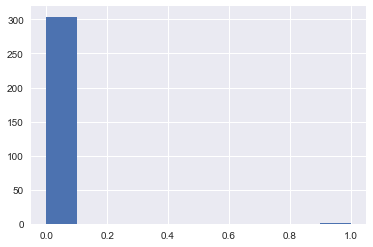

In [11]:
# Success = "Finding a terrorist on the street"
# Let us assume the probability at running into a terrorist p = .01
# Find the probability of failure: q = .99
# Let the number of trials (n) = the total population of Yemen: n = 26183676
# Number of success in those trials is x = 1, which is meeting one terrorist.

# n is how many people I randomly would meet on a given day walking through downtown Sana'a to get lunch or conduct
# day to day research

from numpy.random import binomial
from scipy.stats import binom
n = 150  
p = 1200/26183676 

#Size is 305 based on how many days I lived in Yemen and was walking on the street
encounter =pd.Series(binomial(n, p, size=305))

encounter.hist()

print ("If we assume that the WSJ article issued in 2011 accurately depicts the number of members of al-Qaeda at 1200",
       "and I met", n, "of people every day over a 10 month period, I would encounter at least",
       sum(encounter), "terrorists in that time frame.")
